## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
c = sum(clean_hospital_read_df['Number of Discharges'] >= 1000)
clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'] > 1) & (clean_hospital_read_df['Number of Discharges'] >= 1000)].describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,206.000000,206.000000,0,206.000000,206.000000,206.000000,206.000000
mean,246687.689320,1368.834951,NaN,1.078737,19.688350,18.354854,271.067961
std,124644.115799,396.906196,NaN,0.067573,7.139479,6.676164,128.738893
min,10039.000000,1004.000000,NaN,1.000100,4.800000,4.600000,54.000000
25%,140215.500000,1109.500000,NaN,1.030950,18.125000,17.100000,209.000000
50%,230135.500000,1241.500000,NaN,1.065150,22.550000,21.450000,264.000000
75%,330140.000000,1477.500000,NaN,1.109600,24.200000,22.800000,332.500000
max,520138.000000,3570.000000,NaN,1.454300,31.000000,25.700000,879.000000


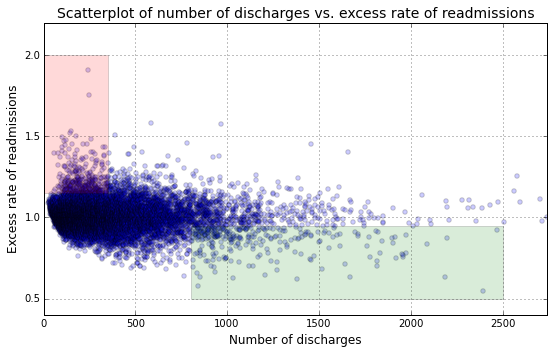

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

###A. Do you agree with the above analysis and recommendations? Why or Why not?

No, I do not agree with the above analysis. The analysis does not state the cutoffs between the large and small capacity hospitals and the values used for number of discharges in the statistics section do not cover all the hospitals in the data set. For this explanation, I will assume that small capacity hospitals are hospitals where the number of discharges is less than 750 and large capacity hospitals are hospitals where the number of discharges is greater than or equal to 750.

The initial observations based on the plots state that there is a downward trend, however the scatter plot seems to follow a constant trend.  There are fewer data points on the right of the plot, so there are fewer large capacity hospitals and fewer large capacity hospitals that exceed a ratio of 1.  However, the proportion of data points that exceed a ratio of 1 may be close to the proportion of small capacity (left side of plot) hospitals that exceed a ratio of 1 and the means of the large capacity hospital and the small capacity hospitals may be almost the same. Therefore, the trend in the plot seems to be constant around a ratio 1 (not downward).

Because the range of the scatterplot seems to expand as the number of discharges increases, the shape of the scatterplot does not seem to resemble a line.  This means that there does not seem to be enough evidence to show a significant correlation between hospital capacity and readmission rates and a conclusion cannot be made about smaller hospitals lacking resources. 

###B. Provide support for your arguments and your own recommendations with a statistically sound anaysis.

** 1. Setup hypothesis test**
+ Assumption: small capacity hospital (number of discharges) < 750; large capacity hosptial >= 750
+ Null Hypothesis (H0): m_sm - m_lg = 0 
 + There is no difference in average excess readmission rate between small capacity hospitals and large capacity hospitals
+ Alternative Hypothesis (HA): m_sm - m_lg != 0 
 + There is a difference in average excess readmission rate between small capacity hospitals and large capacity hospitals

In [6]:
# find means
clean = clean_hospital_read_df[(~np.isnan(clean_hospital_read_df['Excess Readmission Ratio']))]
sm = clean[clean['Number of Discharges'] <750]
lg = clean[clean['Number of Discharges'] >=750]
m_sm, m_lg = sm['Excess Readmission Ratio'].mean(), lg['Excess Readmission Ratio'].mean()

**<!-- list-start: 2-->2. Compute and report the observed significance value (or p-value)**

z-score = 5.81; 
p-value = 1.8e-08

(array([   2.,    7.,   10.,   21.,   30.,   42.,  118.,  150.,  221.,
         207.,  149.,   67.,   25.,   10.,    3.,    0.,    3.,    2.,
           0.,    1.]),
 array([ 0.5495  ,  0.600825,  0.65215 ,  0.703475,  0.7548  ,  0.806125,
         0.85745 ,  0.908775,  0.9601  ,  1.011425,  1.06275 ,  1.114075,
         1.1654  ,  1.216725,  1.26805 ,  1.319375,  1.3707  ,  1.422025,
         1.47335 ,  1.524675,  1.576   ]),
 <a list of 20 Patch objects>)

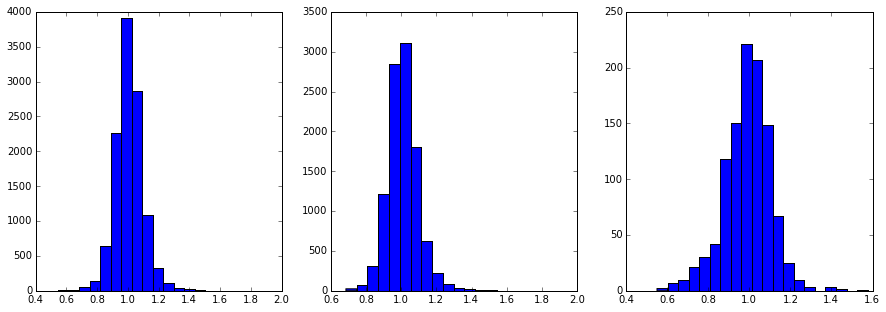

In [7]:
# plot data to see if it is normal distribution (follows CLT independence and sample/skew requirements met)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
plt.subplot(131)
plt.hist(clean['Excess Readmission Ratio'], bins=20)

plt.subplot(132)
plt.hist(sm['Excess Readmission Ratio'].values, bins = 20)

plt.subplot(133)
plt.hist(lg['Excess Readmission Ratio'].values, bins = 20)

In [8]:
# distributions seem to be normal so use z-score to calculate p-value
H0 = (m_sm - m_lg)
SE = ((sm['Excess Readmission Ratio'].std())**2/ len(sm) + (lg['Excess Readmission Ratio'].std())**2/ len(lg))**0.5
z_score = H0/SE
p_val = stats.norm.pdf(z_score)
H0, z_score, p_val

(0.021166561469871059, 5.8122660445615253, 1.8413958982762101e-08)

**<!-- list-start: 3 -->3. Report statistical significance for a = .01**

For two tail test, if statistical significance is 0.1, z-score is 2.58. 

In [9]:
z_score2 = abs(stats.norm.ppf(0.01/2)) # divided by 2 for two tail test
CI = (H0 + z_score2 * SE , H0 - z_score2 * SE )
z_score2, CI

(2.5758293035489008, (0.030546973321540875, 0.011786149618201245))

**<!-- list-start: 4 -->4. Discuss statistical significance and practical significance.**

The observed p-value is almost 0, therefore the null hypothesis is rejected at a significance level of 1%.
This means that we are 99% confident that there is a statistically significant difference between the averages of excess readmissions ratio of small capacity (number of dischargers >750) hospitals and large capacity (number of discharges >= 750) hospitals.

Because the null hypothesis is a tiny value (0.02 difference between small and large), the difference is not practically significant.